In [5]:
cd ..

/Users/mmt/Dropbox/Code/waterbot


In [1]:
import os
import glob
import json

import datetime as dt
import numpy as np
import pandas as pd

from waterbot import util

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [6]:
reservoirs = json.load(open('reservoirs_all.json'))
    
dfs = []
for reservoir in reservoirs:
    station_id = reservoir['station_id']
    csvpath = 'data/historical_levels/{}.csv'.format(station_id)
    df = pd.read_csv(csvpath, parse_dates=['date'])
    df['station_id'] = station_id
    
    dfs.append(df)

 cle whi lew wrs coy sha kes oro ant frd dav bul eng fol unv lon ich nat inv blb nhg cmn par don brd tul nml dnp hth chv exc buc hid mil snl pnf trm scc isb stp inp dnn cch pym cas prr


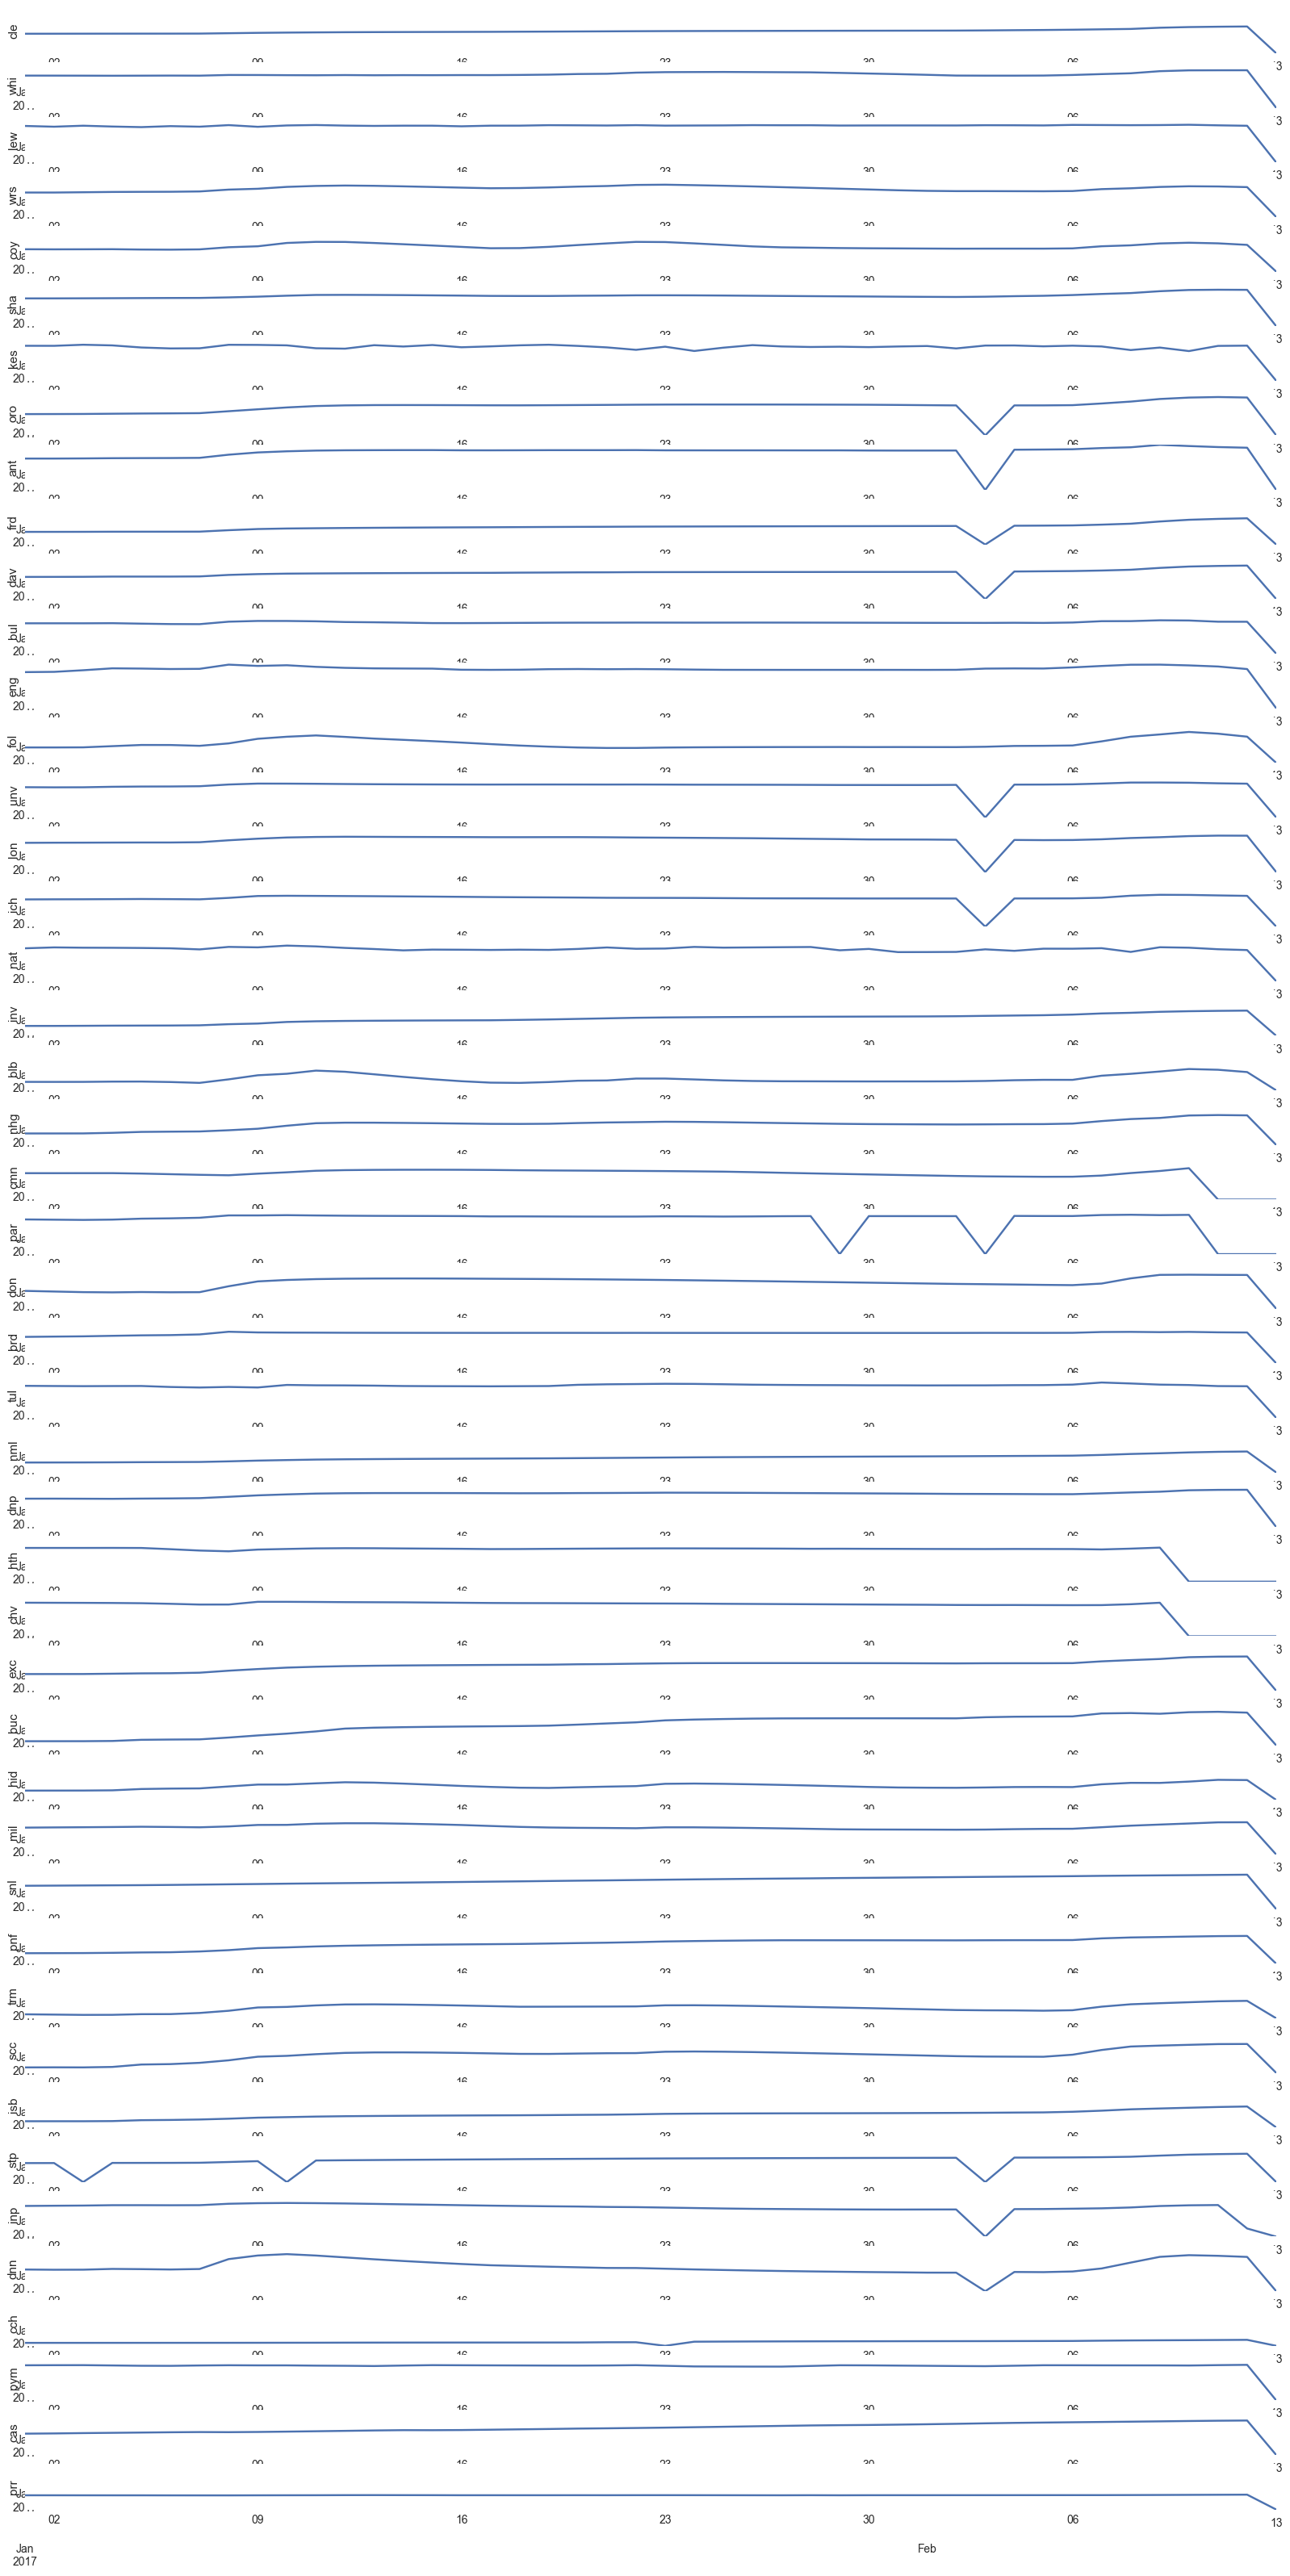

In [11]:
all_dates = pd.Series( pd.date_range('2017-01-01', dt.date.today(), freq='D') )

fig = plt.figure(figsize=(20, 40))

xaxis = None

for i, d in enumerate(dfs):
    station_id = d.station_id.iloc[0]
    print station_id, 
    res = [r for r in reservoirs if r['station_id'] == station_id][0]
#     print res['station_id'], d.date.min(), d.date.max(), res['capacity']
    
    plt.subplot( len(dfs), 1, i+1 )
    d = d[ d.date >= pd.Timestamp('2017-01-01') ]
    d = d.set_index('date').reindex(all_dates)
    d.reservoir_storage.fillna(0, inplace=True)
    
    d.reservoir_storage.plot()
    sns.despine(left=True, bottom=True)
    plt.ylabel(res['station_id'])
    plt.yticks([])
    if xaxis is None:
        xaxis = list(plt.axis()[:2])
#     else:
#         plt.axis(xaxis + list(plt.axis()[2:]) )
    plt.axis(xaxis + [0, res['capacity'] * 1.2] )